Columns:  
- idTram --> identifier of the tram   
- data --> data in format YYYYYMMDD followed by time in format HHMMSS (Example: #20180516103551)  
- estatActual --> current status (0 = no data / 1 = very fluid / 2 = fluid / 3 = dense / 4 = very dense / 5 = congested / 6 = dead)  
- estatPrevist --> predicted state at 15 minutes (0 = no data / 1 = very fluid / 2 = fluid / 3 = dense / 4 = very dense / 5 = congested / 6 = thinned)   
- Tram_Components --> number of components of the tram   
- Descripció --> description of the tram   
- Longitud    
- Latitud  

In [3]:
#https://opendata-ajuntament.barcelona.cat/data/ca/dataset/transit-relacio-trams

In [4]:
import pandas as pd

In [5]:
import pandas as pd

# File path
file_path = '2024_traffic.csv'

# Chunk size 
chunk_size = 10000

# Initialize an empty list to store chunk-wise dataframes
chunk_dfs = []

# Iterate over the CSV file in chunks
for chunk_df in pd.read_csv(file_path, chunksize=chunk_size):
    # Rimuovi le righe dove 'estatActual' o 'estatPrevist' è zero
    chunk_df = chunk_df[(chunk_df['estatActual'] != 0) & (chunk_df['estatPrevist'] != 0)]
    
    # Aggiungi il DataFrame elaborato alla lista
    chunk_dfs.append(chunk_df)

# Concatena tutti i DataFrame dei chunk in un singolo DataFrame
df_traffic_2024 = pd.concat(chunk_dfs, ignore_index=True)

In [6]:
"""
#file path
file_path = '2024_traffic.csv'

#chunk size 
chunk_size = 10000

#initialize an empty list to store chunk-wise dataframes
chunk_dfs = []

#iterate over the CSV file in chunks
for chunk_df in pd.read_csv(file_path, chunksize=chunk_size):
    chunk_dfs.append(chunk_df)

# Concatenate all chunk DataFrames into a single DataFrame
df_traffic_2024 = pd.concat(chunk_dfs, ignore_index=True)
"""

"\n#file path\nfile_path = '2024_traffic.csv'\n\n#chunk size \nchunk_size = 10000\n\n#initialize an empty list to store chunk-wise dataframes\nchunk_dfs = []\n\n#iterate over the CSV file in chunks\nfor chunk_df in pd.read_csv(file_path, chunksize=chunk_size):\n    chunk_dfs.append(chunk_df)\n\n# Concatenate all chunk DataFrames into a single DataFrame\ndf_traffic_2024 = pd.concat(chunk_dfs, ignore_index=True)\n"

In [7]:
df_traffic_2024

,idTram,data,estatActual,estatPrevist,Tram_Components,Descripció,Longitud,Latitud
0,1,20240101003052,1,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191
1,1,20240101003052,1,2,2,Diagonal (Ronda de Dalt a Doctor Marañón),2.101503,41.381631
2,1,20240101004552,2,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191
3,1,20240101004552,2,2,2,Diagonal (Ronda de Dalt a Doctor Marañón),2.101503,41.381631
4,1,20240101005053,1,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191
...,...,...,...,...,...,...,...,...
16398233,534,20240311182054,3,4,1,Ronda Litoral (Nus de la Trinitat a Potosí),2.206062,41.443566
16398234,534,20240311182054,3,4,2,Ronda Litoral (Nus de la Trinitat a Potosí),2.201962,41.448043
16398235,534,20240311182054,3,4,3,Ronda Litoral (Nus de la Trinitat a Potosí),2.200663,41.448814
16398236,534,20240311182054,3,4,4,Ronda Litoral (Nus de la Trinitat a Potosí),2.197778,41.449493


Dataset that records the traffic status of trams in a certain area, with information such as tram identifier, date and time, current and expected status, the number of tram components, the description and geographical coordinates.

In [8]:
len(df_traffic_2024.idTram.unique())

408

In [9]:
#convert date to datetime
df_traffic_2024['data'] = pd.to_datetime(df_traffic_2024['data'], format='%Y%m%d%H%M%S')

In [10]:
df_traffic_2024

,idTram,data,estatActual,estatPrevist,Tram_Components,Descripció,Longitud,Latitud
0,1,2024-01-01 00:30:52,1,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191
1,1,2024-01-01 00:30:52,1,2,2,Diagonal (Ronda de Dalt a Doctor Marañón),2.101503,41.381631
2,1,2024-01-01 00:45:52,2,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191
3,1,2024-01-01 00:45:52,2,2,2,Diagonal (Ronda de Dalt a Doctor Marañón),2.101503,41.381631
4,1,2024-01-01 00:50:53,1,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191
...,...,...,...,...,...,...,...,...
16398233,534,2024-03-11 18:20:54,3,4,1,Ronda Litoral (Nus de la Trinitat a Potosí),2.206062,41.443566
16398234,534,2024-03-11 18:20:54,3,4,2,Ronda Litoral (Nus de la Trinitat a Potosí),2.201962,41.448043
16398235,534,2024-03-11 18:20:54,3,4,3,Ronda Litoral (Nus de la Trinitat a Potosí),2.200663,41.448814
16398236,534,2024-03-11 18:20:54,3,4,4,Ronda Litoral (Nus de la Trinitat a Potosí),2.197778,41.449493


In [11]:
#check missing values
df_traffic_2024.isnull().sum()

idTram             0
data               0
estatActual        0
estatPrevist       0
Tram_Components    0
Descripció         0
Longitud           0
Latitud            0
dtype: int64

In [12]:
#check duplicates 
duplicates = df_traffic_2024[df_traffic_2024.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [idTram, data, estatActual, estatPrevist, Tram_Components, Descripció, Longitud, Latitud]
Index: []


In [13]:
df_traffic_2024.data.min()

Timestamp('2024-01-01 00:05:52')

In [14]:
df_traffic_2024.data.max()

Timestamp('2024-03-11 18:20:54')

### Analysis of the traffic status in certain periods of time:  
Group data by date/time and average current and forecasted status hourly.

In [15]:
# Group by time and average current and predicted state
df_hourly = df_traffic_2024.groupby(df_traffic_2024['data'].dt.floor('H')).agg({'estatActual': 'mean', 'estatPrevist': 'mean'}).reset_index()

In [16]:
df_hourly

,data,estatActual,estatPrevist
0,2024-01-01 00:00:00,1.574243,1.687889
1,2024-01-01 01:00:00,1.855639,1.799414
2,2024-01-01 02:00:00,1.573585,1.659142
3,2024-01-01 03:00:00,1.368501,1.445216
4,2024-01-01 04:00:00,1.237569,1.272560
...,...,...,...
1549,2024-03-11 14:00:00,2.097162,2.127506
1550,2024-03-11 15:00:00,2.110817,2.156347
1551,2024-03-11 16:00:00,2.148657,2.181483
1552,2024-03-11 17:00:00,2.245142,2.289885


In [17]:
#frequency of the 'estatActual' and 'estatPrevist' categories for each hour of the day.
#This gives you an idea of how traffic conditions change over different hours.

# Extract time from 'date' column
df_traffic_2024['hour'] = df_traffic_2024['data'].dt.hour

# Group by time and calculate category frequency
agg_actual = df_traffic_2024.groupby(['hour', 'estatActual']).size().unstack(fill_value=0)
agg_previst = df_traffic_2024.groupby(['hour', 'estatPrevist']).size().unstack(fill_value=0)

print("Frequency of the current state for each hour:")
print(agg_actual)
print("\nPredicted state frequency per hour:")
print(agg_previst)

Frequency of the current state for each hour:
estatActual       1       2       3      4      5      6
hour                                                    
0            278552   60707    8357   2038   1027   8618
1            224767   37306    6029   2251    869   7846
2            173859   23132    4757   1787    727   7688
3            142687   16768    3301   1584    597   7000
4            129441   13564    3561   1287    602   6434
5            229710   39860    9018   1862    773   8272
6            300668  135713   20188   4549   1788   8020
7            249217  333153   61255  22929   9071   8869
8            186965  425399   98199  46339  24761  10111
9            183451  486962  101539  41447  18965  10840
10           183760  518216   89117  30203   8777  10669
11           171445  560219  110209  33974  11692  10997
12           157078  586538  121736  38839  13502  10110
13           148025  617272  121390  42934  13435   9419
14           186972  602458  104100  38912

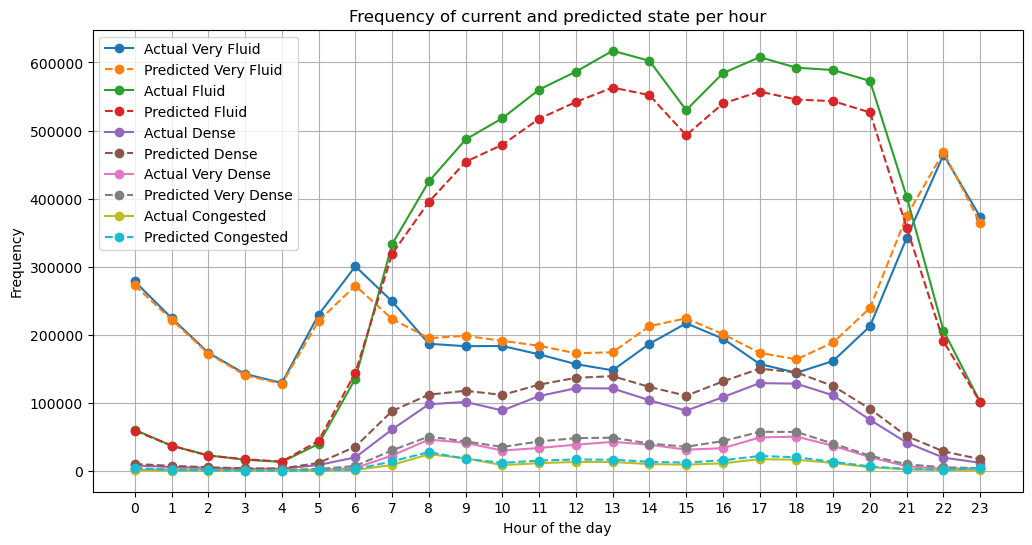

In [18]:
import matplotlib.pyplot as plt

estatActual = {
    'Very Fluid': [278552, 224767, 173859, 142687, 129441, 229710, 300668, 249217, 186965, 183451, 183760, 171445, 157078, 148025, 186972, 217035, 194532, 157348, 144343, 161813, 212768, 342631, 464420, 373154],
    'Fluid': [60707, 37306, 23132, 16768, 13564, 39860, 135713, 333153, 425399, 486962, 518216, 560219, 586538, 617272, 602458, 530002, 584356, 607811, 592295, 588940, 572964, 402615, 206334, 101033],
    'Dense': [8357, 6029, 4757, 3301, 3561, 9018, 20188, 61255, 98199, 101539, 89117, 110209, 121736, 121390, 104100, 88752, 108628, 129249, 128418, 111196, 75296, 41794, 19797, 12312],
    'Very Dense': [2038, 2251, 1787, 1584, 1287, 1862, 4549, 22929, 46339, 41447, 30203, 33974, 38839, 42934, 38912, 31449, 33714, 49431, 50683, 37121, 20552, 7061, 3477, 3904],
    'Congested': [1027, 869, 727, 597, 602, 773, 1788, 9071, 24761, 18965, 8777, 11692, 13502, 13435, 10362, 9476, 11449, 17607, 16704, 11978, 5720, 2720, 1728, 1369],
    'Dead': [8618, 7846, 7688, 7000, 6434, 8272, 8020, 8869, 10111, 10840, 10669, 10997, 10110, 9419, 9248, 8634, 9030, 9664, 10000, 9969, 9850, 9012, 8918, 8538]
}

estatPrevist = {
    'Very Fluid': [272757, 222469, 172558, 140809, 128213, 220533, 272300, 223337, 195293, 198654, 191319, 184063, 173045, 174557, 212906, 224424, 201127, 173684, 164071, 188984, 239637, 374840, 468402, 364195],
    'Fluid': [59516, 37508, 22750, 17565, 13878, 44608, 144522, 319085, 395271, 454128, 479287, 517376, 542020, 563161, 552092, 493179, 539792, 557378, 545533, 543268, 526635, 357589, 190594, 101035],
    'Dense': [10516, 7713, 5774, 4004, 3884, 11996, 35870, 88276, 112272, 118026, 111839, 127011, 137060, 139431, 123615, 110766, 131709, 150474, 144901, 124900, 91386, 51339, 28986, 17566],
    'Very Dense': [2753, 2475, 2097, 1794, 1760, 3137, 7560, 30558, 50799, 43577, 35525, 43600, 48449, 49094, 40512, 35813, 44084, 57693, 57508, 40333, 22675, 10019, 5619, 4393],
    'Congested': [5139, 1057, 1083, 765, 720, 949, 2654, 14369, 28028, 17979, 12103, 15489, 17119, 16813, 13679, 12532, 15967, 22217, 20430, 13563, 6967, 3034, 2155, 4583],
    'Thinned': [8618, 7846, 7688, 7000, 6434, 8272, 8020, 8869, 10111, 10840, 10669, 10997, 10110, 9419, 9248, 8634, 9030, 9664, 10000, 9969, 9850, 9012, 8918, 8538]
}

plt.figure(figsize=(12, 6))
for category in estatActual.keys():
    if category in estatPrevist:
        plt.plot(range(24), estatActual[category], label=f'Actual {category}', marker='o')
        plt.plot(range(24), estatPrevist[category], label=f'Predicted {category}', linestyle='--', marker='o')

plt.title('Frequency of current and predicted state per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

### Comparison of the current state with the expected one:
Compare the current state with the predicted state to identify discrepancies and evaluate the accuracy of predictions.

In [19]:
# Calculate the difference between the current and expected state
df_traffic_2024['discrepancy'] = df_traffic_2024['estatActual'] - df_traffic_2024['estatPrevist']
df_traffic_2024

,idTram,data,estatActual,estatPrevist,Tram_Components,Descripció,Longitud,Latitud,hour,discrepancy
0,1,2024-01-01 00:30:52,1,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191,0,-1
1,1,2024-01-01 00:30:52,1,2,2,Diagonal (Ronda de Dalt a Doctor Marañón),2.101503,41.381631,0,-1
2,1,2024-01-01 00:45:52,2,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191,0,0
3,1,2024-01-01 00:45:52,2,2,2,Diagonal (Ronda de Dalt a Doctor Marañón),2.101503,41.381631,0,0
4,1,2024-01-01 00:50:53,1,2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2.112035,41.384191,0,-1
...,...,...,...,...,...,...,...,...,...,...
16398233,534,2024-03-11 18:20:54,3,4,1,Ronda Litoral (Nus de la Trinitat a Potosí),2.206062,41.443566,18,-1
16398234,534,2024-03-11 18:20:54,3,4,2,Ronda Litoral (Nus de la Trinitat a Potosí),2.201962,41.448043,18,-1
16398235,534,2024-03-11 18:20:54,3,4,3,Ronda Litoral (Nus de la Trinitat a Potosí),2.200663,41.448814,18,-1
16398236,534,2024-03-11 18:20:54,3,4,4,Ronda Litoral (Nus de la Trinitat a Potosí),2.197778,41.449493,18,-1


### Graphical display of data on the map:
use the geographic coordinates provided to map the data and identify the most congested areas via an appropriate visualization system.

### Identification of the busiest hours:
identify the hours of the day when the traffic situation is most congested.  
I calculate the average of the current state for each hour and then find the hours with the highest average state.

In [20]:
# Calculates the average of the current state for each hour
df_hourly['hour'] = df_hourly['data'].dt.hour
avg_per_hour = df_hourly.groupby('hour')['estatActual'].mean()

# Find the hour with the highest average
hour_max_cong = avg_per_hour.idxmax()
max_cong = avg_per_hour.max()

print("Now with maximum congestion:", hour_max_cong)
print("Higher average status:", max_cong)


Now with maximum congestion: 18
Higher average status: 2.174107304220178


### Analysis of the discrepancy between the current and expected state:
Analyze the discrepancy between the current state and the predicted one to evaluate the accuracy of the predictions.  
I average the discrepancy and display a histogram to better understand the distribution of the differences.

Average discrepancy between current and predicted state: -0.02998279449292052


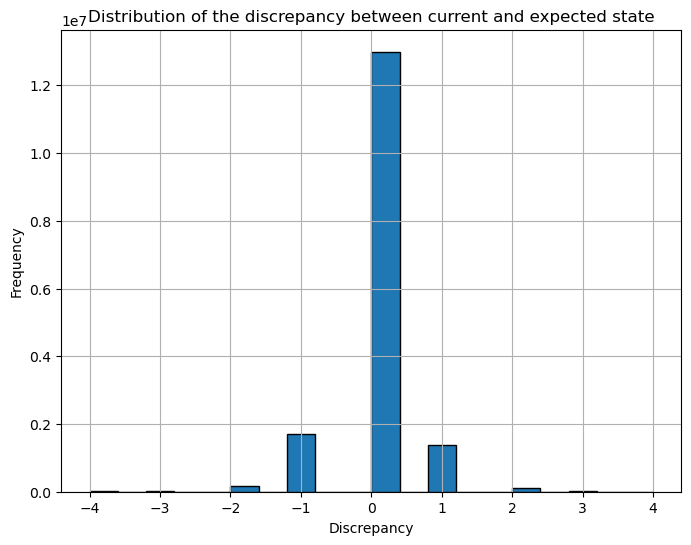

In [21]:
# Calculate the average discrepancy
avg_discrepancy = df_traffic_2024['discrepancy'].mean()

print("Average discrepancy between current and predicted state:", avg_discrepancy)

#histogram
plt.figure(figsize=(8, 6))
plt.hist(df_traffic_2024['discrepancy'], bins=20, edgecolor='black')
plt.title('Distribution of the discrepancy between current and expected state')
plt.xlabel('Discrepancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Analysis of traffic status by day of the week:
Examine whether there are significant variations in traffic status based on the day of the week.  

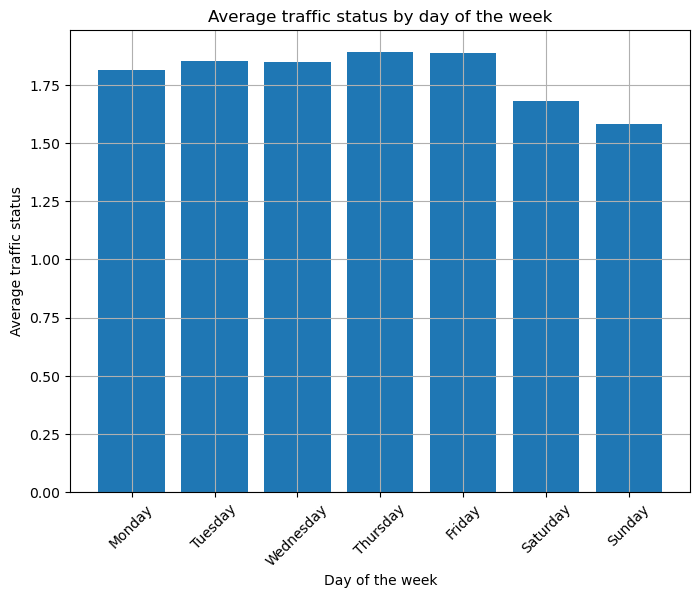

In [22]:
# Calculate the day of the week
df_hourly['week_day'] = df_hourly['data'].dt.dayofweek
# Calculates the average of the current state for each day of the week
avg_per_day = df_hourly.groupby('week_day')['estatActual'].mean()

# Visualizza il grafico a barre per la media dello stato attuale per giorno della settimana
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 6))
plt.bar(week_days, avg_per_day)
plt.title('Average traffic status by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average traffic status')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
avg_per_day

week_day
0    1.817171
1    1.853363
2    1.849504
3    1.892497
4    1.887208
5    1.680285
6    1.584125
Name: estatActual, dtype: float64

### Peak hour analysis:
Identify rush hours when traffic is most congested.

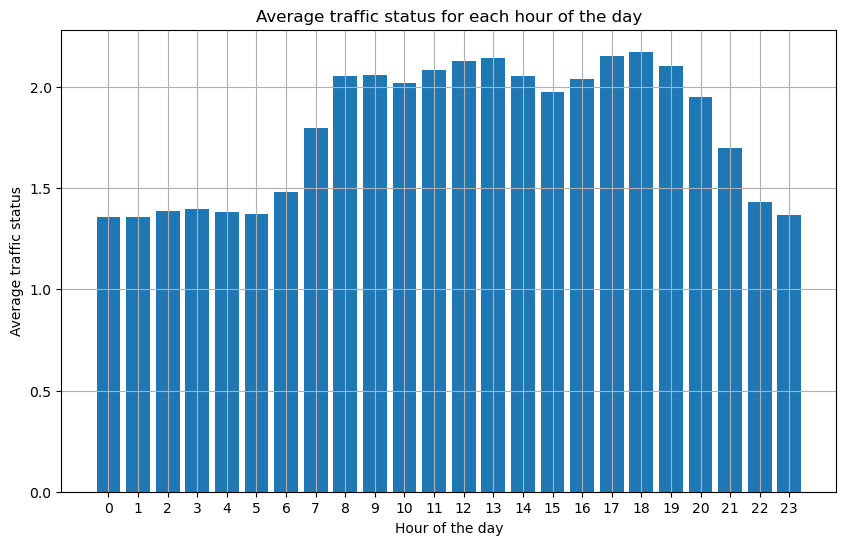

In [24]:
# Calculates the average of the current state for each hour of the day
avg_per_hour = df_hourly.groupby('hour')['estatActual'].mean()

#Average current status for each hour of the daybar chart for average traffic status for each hour of the day
plt.figure(figsize=(10, 6))
plt.bar(avg_per_hour.index, avg_per_hour)
plt.title('Average traffic status for each hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Average traffic status')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [25]:
avg_per_hour

hour
0     1.356720
1     1.357152
2     1.386940
3     1.395656
4     1.381115
5     1.370644
6     1.480015
7     1.798598
8     2.056420
9     2.057569
10    2.020117
11    2.085793
12    2.129873
13    2.140913
14    2.056266
15    1.972854
16    2.039762
17    2.152047
18    2.174107
19    2.103269
20    1.951873
21    1.700099
22    1.431843
23    1.365651
Name: estatActual, dtype: float64

There are some interesting trends:  
- Average traffic status by day of the week:  
Congestion appears to be highest on weekdays (Monday to Friday), with a significant decrease during the weekend (Saturday and Sunday).  
This suggests that traffic could be influenced by work and school activities.  
In particular, Thursday and Friday appear to have the highest average congestion among workdays.
- Average traffic status for each hour of the day:  
The traffic trend shows a significant increase in the morning rush hours (from 7:00 to 9:00) and in the afternoon (from 4.00pm to 6.00pm), indicating the presence of peak times during transfers to and from work/school.  
The time with the highest average congestion is 6pm, suggesting it is one of the most critical hours in terms of traffic.  
These observations could be used to develop more effective traffic management strategies or to plan alternative itineraries during rush hour.

### Traffic state analysis for tram description:
Examine whether there are significant differences in traffic status based on the tram description.  
(This could help identify particular tram lines or routes that are most frequently congested.)

In [26]:
# Calculate the average of the current state for each tram description
avg_per_description = df_traffic_2024.groupby('Descripció')['estatActual'].mean().sort_values(ascending=False)

print(avg_per_description.head(10))

Descripció
Almogàvers (Badajoz a Marina)                                  6.0
Mallorca (Meridiana a Padilla)                                 6.0
Ronda de Sant Pere (Passeig de Sant Joan a Pl. Urquinaona)     6.0
Pg. de Gràcia (Aragó a Gran Via)                               6.0
Pg. Joan de Borbó (Dr. Aiguader a Pepe Rubianes)               6.0
Passeig de Colom (Pl. Antonio López a Pl. Portal de la Pau)    6.0
Pallars (Pere IV a Bac de Roda)                                6.0
Pallars (Meridiana a Pere IV)                                  6.0
Carrer de Sants (Pl. Espanya a Premià)                         6.0
Carrer de Sants (Premià a Pl. Espanya)                         6.0
Name: estatActual, dtype: float64


In [27]:
avg_per_description

Descripció
Almogàvers (Badajoz a Marina)                                     6.000000
Mallorca (Meridiana a Padilla)                                    6.000000
Ronda de Sant Pere (Passeig de Sant Joan a Pl. Urquinaona)        6.000000
Pg. de Gràcia (Aragó a Gran Via)                                  6.000000
Pg. Joan de Borbó (Dr. Aiguader a Pepe Rubianes)                  6.000000
                                                                    ...   
Diagonal (Bac de Roda a Pl. Glòries)                              1.040187
Meridiana (Fabra i Puig a Felip II)                               1.039219
Marina (Gran Via a Meridiana)                                     1.023052
Av. Rio de Janeiro (Passeig de Valldaura a Meridiana)             1.010338
Craywinckel - República Argentina (Balmes a Pl. Alfonso Comín)    1.003000
Name: estatActual, Length: 403, dtype: float64

Tram descriptions with maximum traffic status (6.0):  
There are several tram descriptions that have a maximum traffic status (6.0). This could indicate that in certain areas or segments of the tram network traffic is consistently very congested, without significant changes in traffic status.

Tram descriptions with lower traffic states:  
Some tram descriptions show lower traffic states, such as 3.77 or 2.81. This may indicate that traffic in these areas is generally less congested than in the tram descriptions with maximum traffic status.

Possible influencing factors:  
Differences in traffic status could be influenced by various factors, such as population density, the presence of major road junctions or intersections, the presence of attractions or shopping centers, and so on.

Usefulness in traffic optimization:  
Understanding traffic state variations along different tram descriptions could be useful for traffic optimization and urban planning. For example, you may need to focus more resources or attention on certain areas with increased congestion to improve traffic flow.  
By more closely examining tram descriptions with different levels of congestion, patterns or trends could be identified that could guide strategic interventions to improve urban mobility.

In [28]:
len(df_traffic_2024.Descripció.unique())

403

In [29]:
len(df_traffic_2024.idTram.unique())

408

To further explore the relationship between tram descriptions, distinct trams and traffic status:  

Analysis of the variation in traffic status between different trams sharing the same description:  
calculate the average traffic state for each tram description and then examine the variation of this value between different trams sharing the same description. This way you can see if there is consistency in the level of congestion along a given tram description or if there are significant differences between different trams.

Analysis of factors associated with each tram description:  
examine whether there are specific factors associated with each tram description that influence traffic status. For example, consider population density, the presence of tourist attractions, the presence of major road intersections, or other factors relevant to urban mobility.

In [30]:
# Calculate the average of the current state for each tram description
avg_per_description = df_traffic_2024.groupby('Descripció')['estatActual'].mean()

print(avg_per_description.head())

Descripció
Almogàvers (Badajoz a Marina)                   6.000000
Almogàvers (Marina a Passeig Lluís Companys)    1.771319
Aragó (Balmes a Urgell)                         2.167395
Aragó (Cartagena a Diagonal)                    2.256869
Aragó (Diagonal a Passeig de Sant Joan)         1.793199
Name: estatActual, dtype: float64


In [31]:
avg_per_description

Descripció
Almogàvers (Badajoz a Marina)                   6.000000
Almogàvers (Marina a Passeig Lluís Companys)    1.771319
Aragó (Balmes a Urgell)                         2.167395
Aragó (Cartagena a Diagonal)                    2.256869
Aragó (Diagonal a Passeig de Sant Joan)         1.793199
                                                  ...   
Via Laietana (Pl. Antonio López a Jaume I)      6.000000
Via Laietana (Pl. Uruiqnaona a Jaume I)         6.000000
Viladomat (Gran Via a Manso)                    2.537149
Viladomat (Manso a Av. Paral·lel)               2.537149
Villarroel (Gran Via a Rda. Sant Antoni)        2.078287
Name: estatActual, Length: 403, dtype: float64

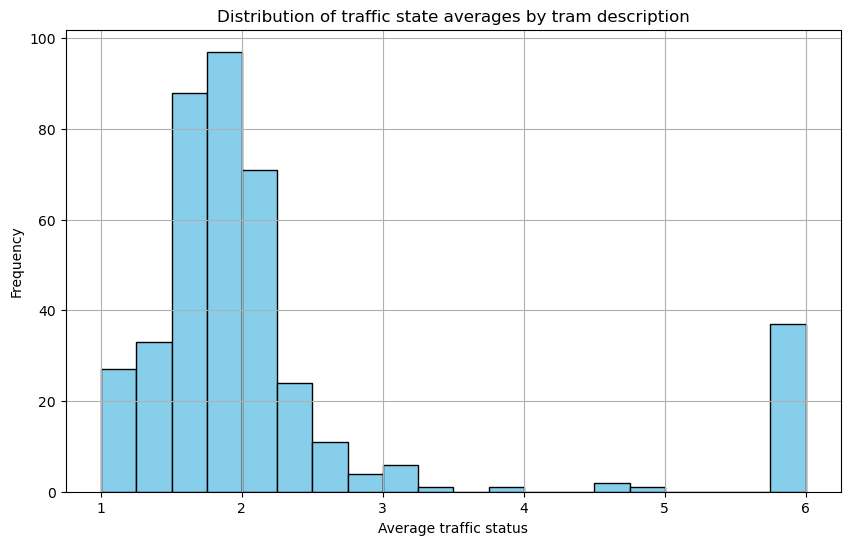

In [32]:
import matplotlib.pyplot as plt

#histogram of traffic state averages for each tram description
plt.figure(figsize=(10, 6))
plt.hist(avg_per_description, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of traffic state averages by tram description')
plt.xlabel('Average traffic status')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
# Merge the average with the original DataFrame
df_with_mean = df_traffic_2024.merge(avg_per_description, left_on='Descripció', right_index=True, suffixes=('', '_media'))

# Calculate the discrepancy between the traffic status of each tram and the average for its description
df_with_mean['discrepancy'] = df_with_mean['estatActual'] - df_with_mean['estatActual_media']

In [34]:
df_with_mean[['idTram', 'Descripció', 'estatActual', 'estatActual_media', 'discrepancy']]

,idTram,Descripció,estatActual,estatActual_media,discrepancy
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),1,2.134684,-1.134684
1,1,Diagonal (Ronda de Dalt a Doctor Marañón),1,2.134684,-1.134684
2,1,Diagonal (Ronda de Dalt a Doctor Marañón),2,2.134684,-0.134684
3,1,Diagonal (Ronda de Dalt a Doctor Marañón),2,2.134684,-0.134684
4,1,Diagonal (Ronda de Dalt a Doctor Marañón),1,2.134684,-1.134684
...,...,...,...,...,...
16398233,534,Ronda Litoral (Nus de la Trinitat a Potosí),3,1.866542,1.133458
16398234,534,Ronda Litoral (Nus de la Trinitat a Potosí),3,1.866542,1.133458
16398235,534,Ronda Litoral (Nus de la Trinitat a Potosí),3,1.866542,1.133458
16398236,534,Ronda Litoral (Nus de la Trinitat a Potosí),3,1.866542,1.133458


In [35]:
#define a threshold to consider a discrepancy to be significant
discrepancy_threshold = 1.5  

#identify trams with significant discrepancies
superior_significant_trams = df_with_mean[df_with_mean['discrepancy'] > discrepancy_threshold]
significant_lower_trams = df_with_mean[df_with_mean['discrepancy'] < -discrepancy_threshold]

print("Trams with traffic states significantly above average:")
print(superior_significant_trams[['idTram', 'Descripció', 'estatActual', 'estatActual_media', 'discrepancy']].head())

print("\nTrams with significantly lower than average traffic conditions:")
print(significant_lower_trams[['idTram', 'Descripció', 'estatActual', 'estatActual_media', 'discrepancy']].head())


Trams with traffic states significantly above average:
     idTram                                 Descripció  estatActual  \
426       1  Diagonal (Ronda de Dalt a Doctor Marañón)            4   
427       1  Diagonal (Ronda de Dalt a Doctor Marañón)            4   
430       1  Diagonal (Ronda de Dalt a Doctor Marañón)            4   
431       1  Diagonal (Ronda de Dalt a Doctor Marañón)            4   
432       1  Diagonal (Ronda de Dalt a Doctor Marañón)            4   

     estatActual_media  discrepancy  
426           2.134684     1.865316  
427           2.134684     1.865316  
430           2.134684     1.865316  
431           2.134684     1.865316  
432           2.134684     1.865316  

Trams with significantly lower than average traffic conditions:
        idTram                                         Descripció  \
693585      22  Av. Foix (Pg. Reina Elisenda a Pg. Manuel Girona)   
693586      22  Av. Foix (Pg. Reina Elisenda a Pg. Manuel Girona)   
693587      22  Av

Trams with traffic states significantly above average, where the discrepancy is positive, indicating that the traffic state of the tram is above average for its description.   
Trams with traffic states significantly lower than average, where the discrepancy is negative, indicating that the traffic state of the tram is lower than average for its description.

### Time series

In [36]:
#convert the 'date' column to datetime type
df_traffic_2024['data_date'] = pd.to_datetime(df_traffic_2024['data'])
df_traffic_2024['data_date'] = df_traffic_2024['data'].dt.date

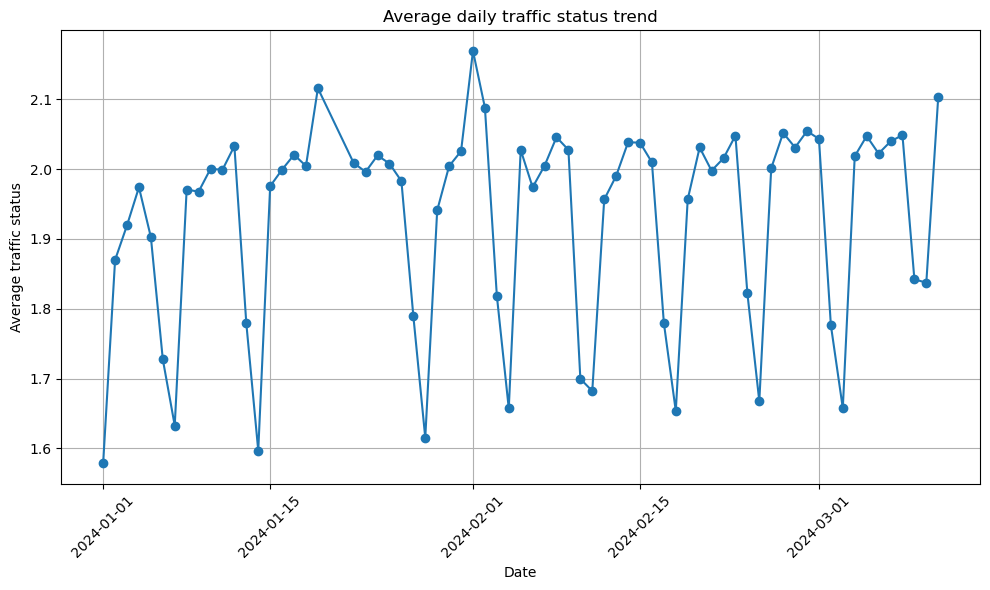

In [37]:
import numpy as np

#calculate the average traffic status for each day
daily_traffic_state = df_traffic_2024.groupby('data_date')['estatActual'].mean()

x_values = np.array(daily_traffic_state.index)
y_values = np.array(daily_traffic_state.values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('Average daily traffic status trend')
plt.xlabel('Date')
plt.ylabel('Average traffic status')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Spatial Analysis:

Use geographic coordinates to conduct a spatial analysis and identify hotspots of congestion.

Calculate congestion metrics for each tram component and analyze the spatial distribution of traffic conditions.

Overlay the tram routes on a city map to visualize the most congested areas.

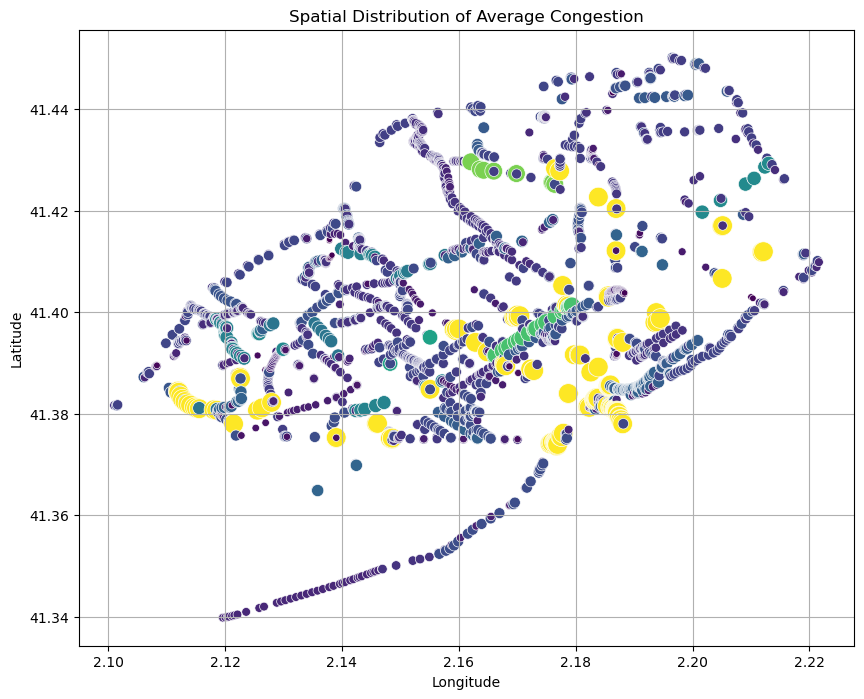

In [38]:
import seaborn as sns

# Calculate the average congestion (estatActual) for each tram component
avg_congestion_per_tram = df_traffic_2024.groupby(['Longitud', 'Latitud'])['estatActual'].mean().reset_index()

# Create a scatter plot to represent the spatial distribution of congestion
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=avg_congestion_per_tram, x='Longitud', y='Latitud', size='estatActual',
                          hue='estatActual', palette='viridis', sizes=(20, 200))

plt.title('Spatial Distribution of Average Congestion')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Remove the legend
scatter.legend_.remove()

plt.show()

Density of Data Points: There are clusters of data points which likely indicate roads or areas with a higher density of traffic data being reported. This could imply either heavy usage of those roads or areas with frequent traffic monitoring.

Congestion Levels: The color and size of the dots correspond to the average congestion level, with larger, more intensely colored dots indicating higher levels of congestion. Yellow and large dots suggest these are the hotspots for congestion.

Geographic Patterns: The spread of the data points shows the geographical distribution of the tram network. The congestion seems not to be uniformly distributed but is concentrated in certain areas which might be key intersections, commercial areas, or city centers.

Potential for Optimization: The areas with the most congestion could be targets for traffic optimization strategies such as traffic light timing adjustments, the introduction of traffic calming measures, or public transport enhancements.

Impact on City Planning: For urban planners, these data could be valuable in making decisions about where to expand roads, add new transit routes, or develop infrastructure projects.

### Prediction Model
We predict the estatActual (current traffic status: 0 = no data, 1 = very fluid; 2 = fluid; 3 = dens; 4 = very dense; 5 = congested; 6 = dead) using the following features:
- Time of day
- Day of the week
- Tram location (latitude and longitude)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [40]:
# Convert 'data' to datetime to extract the day of the week
df_traffic_2024['data_datetime'] = pd.to_datetime(df_traffic_2024['data'])
df_traffic_2024['day_of_week'] = df_traffic_2024['data_datetime'].dt.dayofweek  # Monday=0, Sunday=6

In [41]:
# Selecting features and target variable
X = df_traffic_2024[['hour', 'Latitud', 'Longitud', 'day_of_week']]
y = df_traffic_2024['estatActual']

In [42]:
print(X.shape) 
print(y.shape) 

(16398238, 4)
(16398238,)


In [43]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Predict on the testing set
y_pred_class = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Accuracy: 0.7913934666159295
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.82      0.83   1043828
           2       0.80      0.89      0.84   1727351
           3       0.58      0.40      0.47    316017
           4       0.53      0.35      0.42    109540
           5       0.49      0.19      0.28     39063
           6       0.99      0.94      0.96     43849

    accuracy                           0.79   3279648
   macro avg       0.71      0.60      0.63   3279648
weighted avg       0.78      0.79      0.78   3279648



With an accuracy of approximately 79.1%, the Random Forest Classifier has shown a good level of predictive ability for the traffic status classification task. The classification report provides a more detailed view of the model's performance across different traffic states, using precision, recall, and F1 score metrics. Here's a brief analysis:

Traffic States 1 and 2 (e.g., very fluid and fluid): These categories have the highest number of samples and show strong performance with both high precision and recall, indicating the model's effectiveness in predicting more common traffic states.

Traffic State 6 (e.g., dead): Although this category has fewer samples, it shows excellent precision and recall, suggesting the model can very effectively distinguish this state from others, likely due to distinctive features that set it apart.

Traffic States 3, 4, and 5 (e.g., dense, very dense, congested): These categories show lower precision and recall compared to others. This indicates challenges in accurately classifying intermediate congestion levels, possibly due to overlapping characteristics between these states and the more common states, or due to a lower number of samples to learn from.